In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/HR_Analytics_CSV.csv')

# Display basic information about the dataset
print(df.info())

# Display first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
# For example, fill missing values with mean for numerical columns
df.fillna(df.mean(), inplace=True)


EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

<ipython-input-4-7123fdf8acca>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


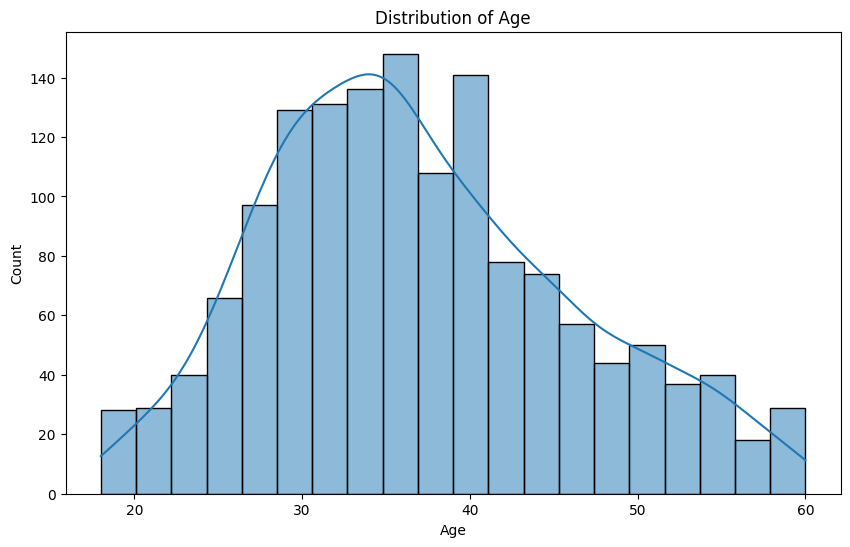

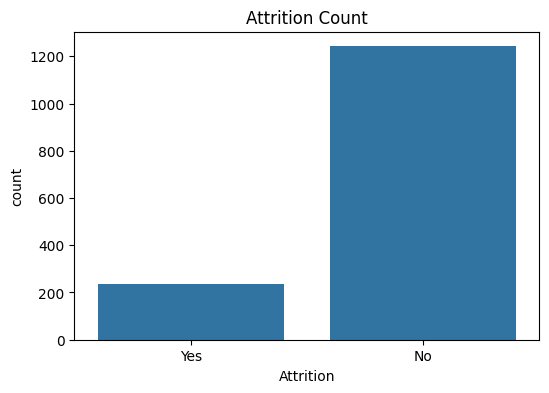

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Example: Attrition count
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()


In [6]:
# Example: Creating Age Groups
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Example: Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'JobRole', 'OverTime'])

print(df.head())


   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1     

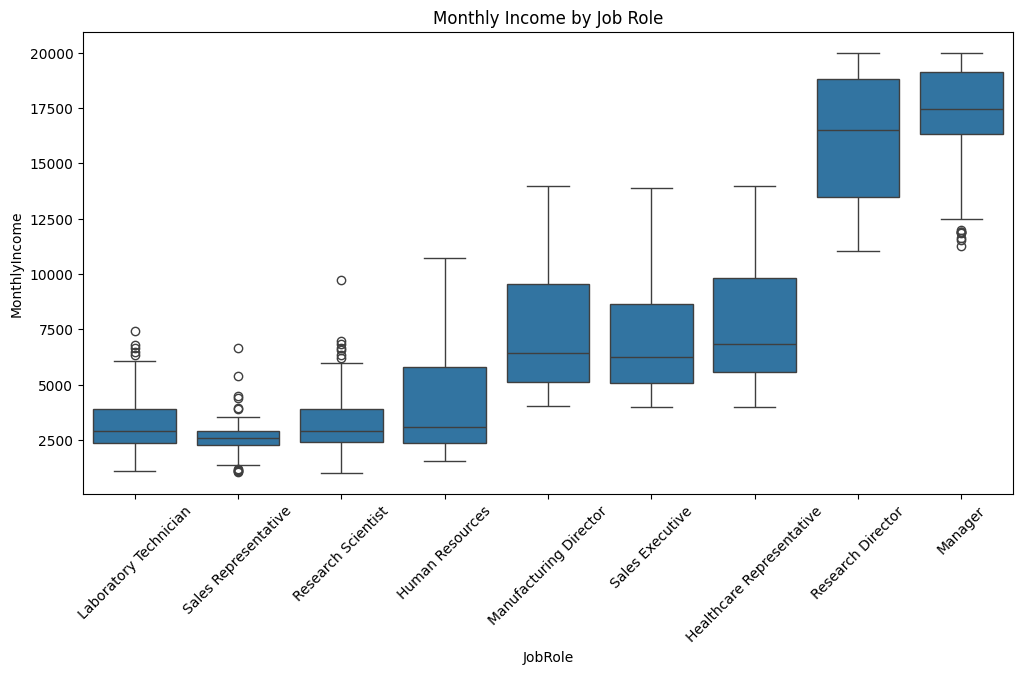

In [7]:
# Example: Monthly Income vs. Job Role
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Job Role')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Convert 'SalarySlab' to numeric values
df['SalarySlab'] = df['SalarySlab'].str.replace('RM', '').astype(float)

# Drop other irrelevant columns for the model (such as 'EmployeeCount', 'Over18', etc.)
columns_to_drop = ['EmpID', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(columns=columns_to_drop, inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'JobRole', 'OverTime'])

# Prepare features and target variable
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: 'Upto 5k'